In [37]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
%matplotlib inline

In [38]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(12,12))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [39]:
df = pd.read_csv('../data/taxon-importer.csv', header=0)
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

taxons = {}
purpose = {}
       
for index, row in df.iterrows():
    if(row['Taxon'] not in taxons):
        purpose = {}
    
    if(row['Purpose'] == "B"):
        purposeCode = "Breeding"
    if(row['Purpose'] == "E"):
        purposeCode = "Educational"
    if(row['Purpose'] == "G"):
        purposeCode = "Garden"
    if(row['Purpose'] == "H"):
        purposeCode = "Hunting"
    if(row['Purpose'] == "L"):
        purposeCode = "Law"
    if(row['Purpose'] == "M"):
        purposeCode = "Medical"
    if(row['Purpose'] == "R"):
        purposeCode = "Reintroduction to wild"
    if(row['Purpose'] == "P"):
        purposeCode = "Personal"
    if(row['Purpose'] == "Q"):
        purposeCode = "Circus"
    if(row['Purpose'] == "S"):
        purposeCode = "Scientific"
    if(row['Purpose'] == "T"):
        purposeCode = "Commercial"
    if(row['Purpose'] == "Z"):
        purposeCode = "Zoo"
    if(row['Purpose'] == "Unspecified"):
        purposeCode = "Unspecified"
        
    purposeDetails = {purposeCode: "X"}
        
    purpose.update(purposeDetails)
    attributes = {"Purpose": purpose}

    taxons.update({row['Taxon']: row['Taxon']})
    G.add_node(row['Importer'], **attributes)

df2 = df.drop_duplicates(['Taxon', 'Importer'])
for i, group in df2.groupby(['Taxon'])['Importer']: #https://stackoverflow.com/questions/35089255/pandas-reshape-dataframe-to-edge-list-according-to-column-values
    # generate all combinations without replacement 
    # from the group of similar column pairs
    for u, v in itertools.combinations(group, 2):
        if(G.has_edge(u,v)):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight = 1)

nx.write_gml(G,"importer-importer-taxon.gml")


Number of nodes:  111
Number of edges:  3580

Average degree: 64.50450450450451
Minimum degree:  1
Maximum degree:  105
[1.00000000e+00 1.44214844e+00 2.07979211e+00 2.99936894e+00
 4.32553522e+00 6.23806385e+00 8.99621402e+00 1.29738760e+01
 1.87102549e+01 2.69829649e+01 3.89134406e+01 5.61189574e+01
 8.09318667e+01 1.16715765e+02 1.68321458e+02 2.42744527e+02
 3.50073640e+02 5.04858152e+02 7.28080393e+02 1.05000000e+03]
[0.08150212 0.01412859 0.         0.         0.         0.
 0.0090596  0.00785252 0.001089   0.00604101 0.00733056 0.0112554
 0.01082575 0.         0.         0.         0.         0.
 0.        ]


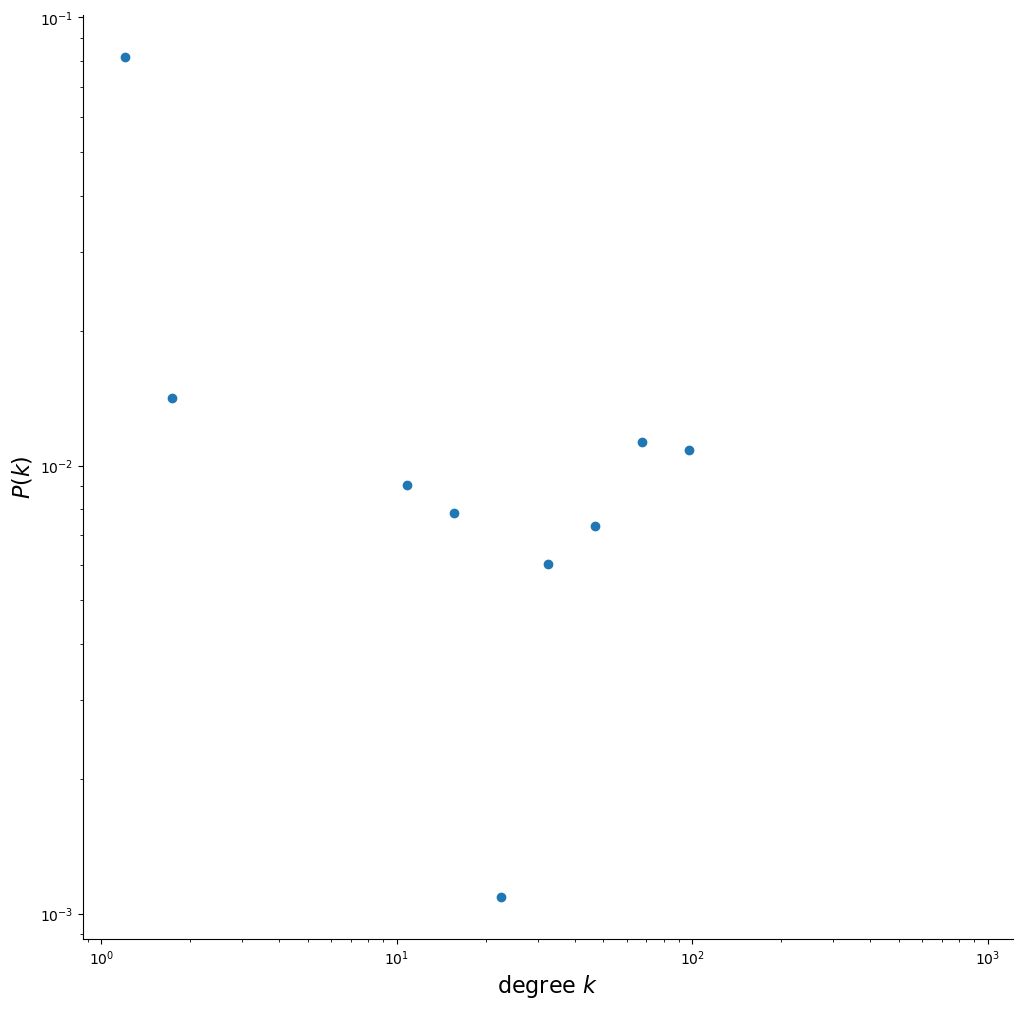

In [40]:
degrees = [G.degree[node] for node in G]
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print()
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))

plot_degree_dist(G)